# 2. Constants

How to store data in TF? There are various ways, first we learn how to create constants.  

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1


In [3]:
a = tf.constant(2)
# lets see what a has now

In [4]:
a
# so a is tensor object 

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [5]:
b = tf.constant(3)

In [6]:
b
# so it does not represent the value it has now. So now if we are pronting a, it is not printing its value, its just printing
# the tensor obj

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [7]:
# what if we sum it
a  + b

# so its not doing the addition, its just saying you want to do the addition.

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [8]:
c = a+b

In [9]:
# if we want to do the addition we need to create session.
sess = tf.Session()
sess.run(c)

AttributeError: module 'tensorflow' has no attribute 'Session'


**TF 2.0 supports eager execution which means you don't have to explicitly create a session and run the code in it. So the simplest solution would be:**

In [10]:
print(c)

tf.Tensor(5, shape=(), dtype=int32)


In [11]:
# More operations
a1 = tf.constant([[3, 3]]) # array 1x2

In [12]:
a2 = tf.constant([[3],[3]]) # array 2x1

In [13]:
# matrix multiplication
ans = tf.matmul(a1, a2)

In [14]:
print(ans)
# now as we can see, it gabe us the result along with the shape

tf.Tensor([[18]], shape=(1, 1), dtype=int32)


**Now as we saw, these are constants, once assigned you cannot change it.**

# 3. Session
url : https://www.tensorflow.org/api_docs/python/tf/compat/v1/Session  
### If you have TensorFlow v2 then you dont have to use Session.  However if you want to use it,  method is below

A session may own resources, such as tf.Variable, tf.queue.QueueBase, and tf.compat.v1.ReaderBase. It is important to release these resources when they are no longer required. To do this, either invoke the tf.Session.close method on the session, or use the session as a context manager. The following two examples are equivalent:


#### Using the `close()` method.  
sess = tf.compat.v1.Session()  
sess.run(...)  
sess.close()  
  
#### Using the context manager.
with tf.compat.v1.Session() as sess:  
  sess.run(...)    
  
### To run the session for placeholder, we need to disable the eager execution from v1 which we will do it later(not from v2 in our case, although we can do it but to understand both v1 and v2, we are doing it on v1.)

In [15]:
with tf.compat.v1.Session() as sess:
    a = tf.constant(5.0)
    b = tf.constant(6.0)
    c = a * b
    sess.run(c)
print(c)

Tensor("mul:0", shape=(), dtype=float32)


In [16]:
# or we can use it liek this 
with tf.compat.v1.Session() as sess:
    print(c.eval())
    
# also we cannot use the eval outside the session. 
# if we are using session with 'with' block, it will use the default session of its own block, and that session will
# not work outside the 'with' block

30.0


# 4. Variables

A variable maintains shared, persistent state manipulated by a program.  
  
The Variable() constructor requires an initial value for the variable, which can be a Tensor of any type and shape. This initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.  
  
  
v = tf.Variable(1.)  
v.assign(2.)  
url = https://www.tensorflow.org/api_docs/python/tf/Variable

In [17]:
var1 = tf.Variable(100) # one way to create variable
var1
# remember this is global variable

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=100>

In [18]:
var2 = tf.Variable(3)

In [19]:
sum1= tf.add(var1, var2)
print(sum1)
# as we can see, we got the output.

tf.Tensor(103, shape=(), dtype=int32)


In [20]:
# but what if we do it with session?
# it will work fine if the variable have 103, 
# The issues with variable is with tensorflow, we need to explicitly call initialize on variables only then these
# variables will get 100 and 3. This all stuff works in Tensorflow v1. We dont have to initialize all this even  with compat 
# version. else it will give error.
# Line which is used to call explicitly is tf.global_variables_initializer().  


# Warning: THIS FUNCTION IS DEPRECATED. It will be removed in a future version. 
# Instructions for updating: Prefer Variable.assign which has equivalent behavior in 2.X.

with tf.compat.v1.Session() as sess:
    sess.run(sum1)

AttributeError: Tensor.graph is meaningless when eager execution is enabled.

In [21]:
# to change the value of variable1, we can do is we pass it in assign()
# in older version, we have to pass it in session to assign it, now in tf v2, we dont need session to assign it.
var1.assign(1232)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=1232>

**tf.get_static_value**  
Returns the constant value of the given tensor, if efficiently calculable.  
REMEMBER IT RETURNS THE OPERATIONAL RESULT NOT THE CONSTANT

In [22]:
var3 = var1 + var2  # ADDITION OPERATION
print(tf.get_static_value(var3))

1235


If we try to print the variable, it will return none as there is no operation done on it.

In [23]:
print(tf.get_static_value(var2))

None


In [24]:
# by default, variables are going to be global.
var1

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1232>

# 4. Placeholder


Not supported in TF v2, Instead,  
### tf.compat.v1.placeholder  
As discussed before, we need to disable eager execution.  
Inserts a placeholder for a tensor that will be always fed.  

tf.compat.v1.placeholder(  
    dtype, shape=None, name=None  
)  

In [18]:
x = tf.placeholder(tf.int16)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [19]:
x = tf.compat.v1.placeholder(tf.int16)

RuntimeError: tf.placeholder() is not compatible with eager execution.

**As we can see, both versions are not working, so we need to use it with v1 and disable the eager execution mode**

In [15]:
# disabling the eager execution for v1 not v2 
tf1.compat.v1.disable_eager_execution()

# initializing the placeholder.
x = tf1.placeholder(tf1.int16)

In [16]:
# as we have disabled eager execution, we can use session as well.
with tf1.compat.v1.Session() as sess:
    sess.run(x)
    
# it will not work until you feed the placeholder value.

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype int16
	 [[node Placeholder (defined at <ipython-input-15-297178b1766d>:5) ]]

Original stack trace for 'Placeholder':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    result = self._run_cell(
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-297178b1766d>", line 5, in <module>
    x = tf1.placeholder(tf1.int16)
  File "C:\Users\hashi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\array_ops.py", line 3285, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\hashi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6727, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\hashi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\hashi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\hashi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


In [17]:
# to pass the value of placeholder, we need to pass it in feed_dict
y = tf1.placeholder(tf1.int32)
with tf1.compat.v1.Session() as sess:
    print(sess.run(y, feed_dict = {y: 10}))    # we need to pass the value of x in key-value pair
    

10


**We can run same code with different values in it using placeholder**

In [23]:
a = tf1.placeholder(tf1.int32)
y = tf1.constant(32)
z = a * y
with tf1.compat.v1.Session() as sess:
    print(sess.run(z, feed_dict = {a: int(input('Insert a: '))}))
    
# we can run the above code multiple times with different input
    

Insert a: 1102
35264


In [24]:
# one option we have is we can pass the shape of the placeholder
# by default the shape is none
a = tf1.placeholder(tf1.int32, shape = (2,3))
z = a * tf.constant(12)
with tf1.compat.v1.Session() as sess:
    print(sess.run(z, feed_dict = {a: [[1,2, 3], [4,5,6]] }))

[[12 24 36]
 [48 60 72]]


# 5. MNIST Data

In [ ]:
# #### loading dataset from sklearn

# from sklearn.datasets import load_digits
# mnist = load_digits()
# mnist.keys()


In [2]:
# mnist = tf.keras.datasets.mnist
# for running the below code, you need to have inputdata.py, dataset.py and MNIST_data folder in the same folder which has this
# notebook.

import input_data as ids
mnist = ids.read_data_sets('MNIST_data/', one_hot = True)


Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [3]:
mnist

_Datasets(train=<input_data._DataSet object at 0x000002C215A693A0>, validation=<input_data._DataSet object at 0x000002C216E50790>, test=<input_data._DataSet object at 0x000002C216E50850>)

In [4]:
# so the above dataset has 70000 images.
# lets see how these images are split
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# lets look at shape
mnist.train.images.shape

# so as we cans see, 55000 images are in training data and they have a shape of 28 x 28

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
# lets check what labels are
mnist.train.labels, mnist.train.labels.shape

# labels are basically y data.

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 (55000, 10))

**By looking at the labels, we can define that this is multiclass classification. So the structure of our neural network in the output layer will have 10 units, and each units either predict 0 or 1. For that we need to one hot encode to the label and that we did.**

In [9]:
# lets see the label
mnist.train.labels[0]

# indicates the value of label is 7.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

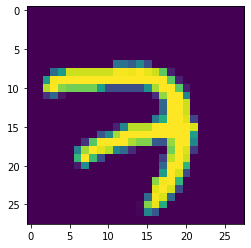

In [10]:
# plotting an image
# for that we need to first convert the image to array then reshape it to m x n matrix.

import numpy as np
from matplotlib import pyplot as plt

first_image = mnist.train.images[0]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28, 28))

# plotting the image
plt.imshow(first_image)
plt.show()

# 6. Initialising Weights and Biases

**What is the Neural Network we built around it?**   
  
As the Image is of size 784, our input layer will have 784 entries.  
Lets say we have 2 hidden layers, h1 and h2 and output layer.  
And we have 10 output units in output layer, because we have 10 possible classes.  
And lets say for now, we will have 256 entries in both hidden layers(obviously we can change it.).  
And there will be one biases in input layer, h1 and h2.   
  
**So how many weights will be required?**    
So between input layer and h1, weights required are 784x256 weights and 256 biases.  
Between h1 and h2, 256x256 weights and 256 biases,  
and between h2 and output layer, it will require 256x10 weights and 10 biases.  
  


In [11]:
# creating units in layers. 

# but first we need to import these
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

n_input = 784
h1 = 256
h2 = 256
n_classes = 10  # output layer

**tf.random_normal()**  
Changed to **tf.random.normal()**   
In v2, we dont need session to execute it.  
https://www.tensorflow.org/api_docs/python/tf/random/normal

In [12]:
tf.random.normal([1])  # shape must be passed in array, its a 1d array

<tf.Tensor 'random_normal:0' shape=(1,) dtype=float32>

In [13]:
tf.random.normal([1, 2]) # 2d array

<tf.Tensor 'random_normal_1:0' shape=(1, 2) dtype=float32>

In [14]:
tf.random.normal([1, 2, 3])  # 3d array

<tf.Tensor 'random_normal_2:0' shape=(1, 2, 3) dtype=float32>

In [15]:
# creating weights and biases.  
# for weights we will create dictionary where keys will be layer name and its values will be the keys.

weights = {
    'h1' : tf.Variable(tf.random.normal([n_input, h1 ])),  # variable will be of size n_input x h1
    'h2' : tf.Variable(tf.random.normal([h1, h2 ])),
    'out' : tf.Variable(tf.random.normal([h2, n_classes]))
}

# creating biases

biases = {
    'h1' : tf.Variable(tf.random.normal([h1])),  # variable will be of size of the layers
    'h2' : tf.Variable(tf.random.normal([h2])),
    'out' : tf.Variable(tf.random.normal([n_classes]))   
}

# 7. Forward Propagation   
  
So we will create a function for Forward Propogation. it will take X, weights, biases.    
So we will do matrix multiplication of X and weights.    
SO dimension of X is 10000 x 784, weights are 784x256 at first layer, weight is actually a dictionary, for h1 it is of weight 784x256.    
  
So we will do this multiplication and result will be 10000x256 and we will add biases into it.  
So for 10000 images, we will have output as 256 for layer 1.  
Then we will use this output for layer2 then we will make that output of layer 2 pass through output layer to get our result.  
At hidden layer 1, we will use activation function as 'relu'. 'relu' means *max(a, 0)* which means if it isnegative, it will push it to 0.  
  
And h2 layer activation function will also be relu.  
And we will be using identity at the output layer means we will not be using any activation function on the output layer.

In [16]:
# def forward_propagation(x, weights, biases):
#     # this will give you net input going in layer1.
#     input_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])  # multiplying layer1 weights and inputs and adding biases.
#     output_layer1 = tf.nn.relu(input_layer1)  # output of layer1 by applying relu function.  
    
#     # this will give you net input going in layer2.
#     input_layer2 = tf.add(tf.matmul(output_layer1, weights['h2']), biases['h2'])
#     output_layer2 = tf.nn.relu(input_layer2)
    
#     # this will give you output.
#     output = tf.add(tf.matmul(output_layer2, weights['out']), biases['out'])
#     return output


In [17]:
def forward_propagation(x, weights, biases):
    # this will give you net input going in layer1.
    input_layer1 = tf.matmul(x, weights['h1'])+ biases['h1']  # multiplying layer1 weights and inputs and adding biases.
    output_layer1 = tf.nn.relu(input_layer1)  # output of layer1 by applying relu function.  
    
    # this will give you net input going in layer2.
    input_layer2 = tf.matmul(output_layer1, weights['h2']) + biases['h2']
    output_layer2 = tf.nn.relu(input_layer2)
    
    # this will give you output.
    output = tf.matmul(output_layer2, weights['out'])+ biases['out']
    return output


# 8. Finding Predictions and Accuracy

Lets find the predictions without any optimization. 

If we look here, passing weights and biases is fine as we have it in dictionary, but how do we pass this x?  
So we need some tensor object which we have to pass as x.  
So this x, sometime will be training data and sometime will be testing data, So we need to add this x in placeholder.  
**Now as we know placeholder don't work in v2, we need to find out a way for it or try to use the older version.  
Reason behind importing those packages is because of unstability of the versions. Might be possible that it will be fixed soon.**

In [18]:
# now converting x into tensor object.
x = tf1.placeholder('float', [None, n_input])
y = tf1.placeholder(tf1.int32, [None, n_classes])

# Now in case of x, we dont know the size of input(which means we dont know how many inputs are there), 
# but we know what is the size of an image, So for giving size, we gave first arg as None which means we dont know how 
# many images are there and we know whats the size of each image which is 784 so we gave it. Same is the case for y. 
# y will be integer as it contains the classes which we one hot encoded it. 

In [19]:

# # reason behind running the above code is it will give the error : 
# # RuntimeError: Attempting to capture an EagerTensor without building a function.


pred = forward_propagation(x, weights , biases)

# for finding the answers, we need to find the index of max.
predictions = tf.argmax(pred, 1)  # argmax will give the index of maximum

# to find the correct labels, we need to find that in y.
correct_labels = tf.argmax(y, 1) 

# now to run this, we need to create session. 
sess = tf1.Session()

# initializing weights
sess.run(tf1.global_variables_initializer())
predictions_eval = sess.run(predictions, feed_dict = {x:mnist.test.images} )
predictions_eval

array([5, 0, 0, ..., 0, 3, 0], dtype=int64)

In [20]:
# running the above code will give you different predictions each time. To get the same predictions, 
# we need to refactor the code
sess = tf1.Session()
sess.run(tf1.global_variables_initializer())
x = tf1.placeholder('float', [None, n_input])
y = tf1.placeholder(tf1.int32, [None, n_classes])

# getting predictions
pred = forward_propagation(x, weights , biases)
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1) 

# running through session.run()
predictions_eval = sess.run(predictions, feed_dict = {x:mnist.test.images} )
correct_pred = tf.equal(predictions, correct_labels)

In [21]:
# getting the correct labels, in this, we need to run the predictions as well as the correct_labels as well.
predictions_eval, labels, correct_pred = sess.run([predictions, correct_labels, correct_pred], feed_dict={x:mnist.test.images, y:mnist.test.labels})
predictions_eval , labels, correct_pred

(array([3, 2, 3, ..., 1, 1, 1], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([False,  True, False, ..., False, False, False]))

In [22]:
correct_pred.sum()
# so we got 901 correct predictions 

1168

In [23]:
# getting the correct labels, in this, we need to run the predictions as well as the correct_labels as well.
correct_pred = tf.equal(predictions, correct_labels)
predictions_eval, labels, correct_pred = sess.run([predictions, correct_labels, correct_pred], feed_dict={x:mnist.train.images, y:mnist.train.labels})
predictions_eval , labels, correct_pred

(array([3, 1, 1, ..., 2, 1, 1], dtype=int64),
 array([7, 3, 4, ..., 5, 6, 8], dtype=int64),
 array([False, False, False, ..., False, False, False]))

In [24]:
correct_pred.sum()

5781

# 9. Cost Function

We need to optimize the cost. 
So the cost we will use is **Cross Entropy** cost.

In [25]:
# To calculate the cross entropy cost, we need predictions 

sess = tf1.Session()
sess.run(tf1.global_variables_initializer())
x = tf1.placeholder('float', [None, n_input])
y = tf1.placeholder(tf1.int32, [None, n_classes])

# getting predictions
pred = forward_propagation(x, weights , biases)
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1) 

# As we got predictions, we can implement cross entropy
tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'softmax_cross_entropy_with_logits_sg/Reshape_2:0' shape=(None,) dtype=float32>

In [27]:
# so what we will do is we will take the mean of the values 
# which means if we have 10000  images we dont want a 10000 sized array(plus 10 different labels), 
# we just want one value so that it will be easier to understand

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

**Now that we have the cost, what do we need to do now? now we need to write and figure out how to optimize this cost by changing weights, the best part is we dont have to write the backpropogation ourself, we will use the inbuilt optimizer which will take this cost function, figure out what all variables this cost function is dependent upon and then change those weights to optimize on cost.**

In [28]:
# running through session.run()
predictions_eval = sess.run(predictions, feed_dict = {x:mnist.test.images} )
correct_pred = tf.equal(predictions, correct_labels)
correct_pred

<tf.Tensor 'Equal_2:0' shape=(None,) dtype=bool>

# 10. Running the Optimizer

In [80]:
sess = tf1.Session()
sess.run(tf1.global_variables_initializer())
x = tf1.placeholder('float', [None, n_input])
y = tf1.placeholder(tf1.int32, [None, n_classes])

# getting predictions
pred = forward_propagation(x, weights , biases)
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1) 

# As we got predictions, we can implement cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [81]:
# now implementing optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)

# so if we want our optimizer to work on cost, 
optimize = optimizer.minimize(cost)

In [82]:
# now running the cost
c = sess.run(cost, feed_dict={x:mnist.train.images, y:mnist.train.labels})
c

1944.1223

In [83]:
# now we want to run the optimizer as well to reduce the cost
# remember we need to pass the optimizer with cost in new session else it will give error
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [84]:
c, o = sess.run([cost, optimize], feed_dict={x:mnist.train.images, y:mnist.train.labels})
c
# run it again and the cost will be less.

1934.9459

# 11. How does the Optimizer work ?

The way optimizer works is by default all the variables that you create has a property **trainable = True**  
So what this optimizer does for us is it finds out what all variables exists which has trainable = True, and its going to find gradient wrt all of them and change the values for all of them to try and optimize the function that you have. 
So we call minimize on cost, cost is dependent on weights and biases and these are the only variables which we created which have trainable = True.If we want we can even say that we want you to train on weights, if we dont want, we can pass trainable = False.  
   
So lets check which all are trainables.

In [67]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32>]

If we do one of the trainables to be false, we will see that that particular variable will not be changed when we optimize.

# 12. Running Multiple Iterations

In [72]:
# all we need to do is we need to run this code multiple times and at the same time we will find the predictions. 
for i in range(25):
    c, o = sess.run([cost, optimize], feed_dict={x:mnist.train.images, y:mnist.train.labels})
    print(c)

858.4905
607.53357
447.29898
324.68643
232.62843
192.55856
176.73094
162.894
146.01962
130.09297
118.18825
109.39218
102.50127
96.6726
91.29068
86.439384
82.19738
78.4587
75.03629
72.00887
69.31768
66.84227
64.48732
62.202427
60.053295


In [74]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_pred = tf.equal(predictions, correct_labels)
predictions_eval, correct = sess.run([predictions, correct_pred], feed_dict = {x:mnist.test.images, y:mnist.test.labels} )
correct.sum()

# we got 88% accuracy.
# lets try to run the data in batches.(batch gradient)

8829

# 13. Batch Gradient Descent

What we did above is we gave complete data in feed_dict.  
So lets have batch size of 100, we will run the train data loop to 550 times as it have 55000 images and this loop will call the c and _ every time.  
  


In [87]:
# we need to run chapter 10 again before running this.
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    
    # to print c only 25 times, we need to add c into total cost
    total_cost = 0
    for j in range(num_batches):
        # mnist gives us the way to find the next batch
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, o = sess.run([cost, optimize], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

144.59566029595987
127.2348647205685
111.59988022088237
130.10961578199317
100.48243910983763
92.17223857966962
85.91728730646173
115.6466229147045
82.18699420422126
80.48632407905825
74.78467465910944
62.38809691751521
51.797957158023564
80.77875794693136
51.08150137557459
61.0849328309705
63.44990200066832
65.63887774693285
54.436397831188515
58.9679408597367
49.01499483716043
49.635187422695026
58.581354380796256
47.927827825049576
36.1667811576732


Cost here seems to be higher(i have run this twice) because we added different batches to the cost as well.

In [88]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_pred = tf.equal(predictions, correct_labels)
predictions_eval, correct = sess.run([predictions, correct_pred], feed_dict = {x:mnist.test.images, y:mnist.test.labels} )
correct.sum()

# accuracy increased to 95% in first run and and 96.7% in second run.

9677

# TENSORFLOW 2 : MNIST: Load and Process the Data

In [1]:
import tensorflow as tf

*we can also load mnist dataset from keras.*

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# lets look at the shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


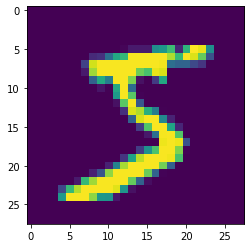

5


In [5]:
# Lets see how the input image looks like.
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

As we can see above, it looks like number 5.

**Before feeding this data into Neural Network, we need to do some processing.    
We need to flatten these images(which means we have 60000 images of shape 28 x 28, which is 2d array, we need to flatten it to 1d array which is 784).**

To reshape, the first dimension should be no of samples, to flatten out rest of the dimension, we add -1 in the last argument.  
And we need to do one more thing, currently, the pixels values are between 0 to 255, so we need to normalize it between 0 to 1 also, to do that we need to multiply it with 255.0  

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0], -1)/255.0

To train our Neural Network, we need to one hot encode our labels also. After one hot encoding, for one training samples, there will be 10 different values in the output. So it will be one hot encoded. 

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
# lets look at the shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


# TENSORFLOW 2 : Model Architecture and Building Model using Sequential API

we will have 2 hidden layers(dense layers) with 256 units and one output layer with 10 units(as it is no of class)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# initializing the model object
model = Sequential()
# we also need to define input shape which is 784 of one dimension in our case.
model.add(Dense(256, activation = 'relu', input_shape = (784, )))
model.add(Dense(256, activation = 'relu'))
# output layer
model.add(Dense(10, activation = 'softmax'))  # for binary classification, we use sigmoid, for more class we use softmax.

In [11]:
# as model is defined, we need to define what is the optimizer, loss function and metric
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # for bin class, we use binary_crossentropy, for multiclass, we use this.
# metric is on which  we want to optimize our model.

In [12]:
# fitting the model
model.fit(x_train, y_train, epochs = 10, batch_size = 1024)

Epoch 1/10
59/59 [==============================] - 3s 15ms/step - loss: 0.5937 - accuracy: 0.8411
Epoch 2/10
59/59 [==============================] - 1s 15ms/step - loss: 0.2063 - accuracy: 0.9403
Epoch 3/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1461 - accuracy: 0.9575
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1125 - accuracy: 0.9673
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0900 - accuracy: 0.9743
Epoch 6/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0725 - accuracy: 0.9791
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0598 - accuracy: 0.9831
Epoch 8/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0507 - accuracy: 0.9857
Epoch 9/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0430 - accuracy: 0.9880
Epoch 10/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0349 - accuracy: 0.9903


In [13]:
# lets see how our model does on testing data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0708 - accuracy: 0.9763


[0.07083430886268616, 0.9763000011444092]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# TENSORFLOW 2 : Building Model using Functional API

What we learned uptil now is Sequential. Uptil now our model is stack of layers and a graph where we have different paths for the input to the output. As we can see, one path is from input, h1, h2 to the concat. Second path is input, h3 to the concat. 
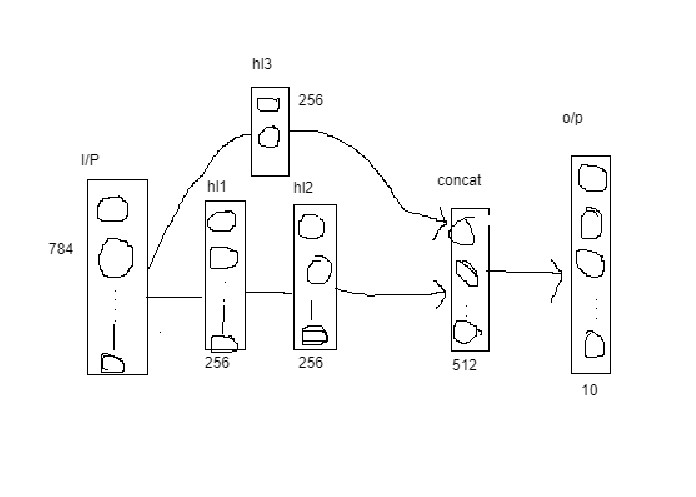   
For this, we will be using Functional API

In [15]:
# importing functional api
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

*so we need to think in terms of how data flows in the model using this api
first we need to define the input object* 

In [16]:
input = Input(shape = [784,])

*now building the first path*

In [17]:
# we need to pass input 1 through the dense layer.
hidden_1 = Dense(256, activation = 'relu')(input)

*Now building the hidden2*  
In this, we will pass hidden_1

In [18]:
hidden_2 = Dense(256, activation = 'relu')(hidden_1)

*Now we will pass the input from hidden_3 as shown in diagram*

In [19]:
hidden_3 = Dense(256, activation = 'relu')(input)

*Now we need to concatenate hidden_2 and hidden_3*

In [20]:
concat = Concatenate()([hidden_2, hidden_3]) #this will concatenate hidden2 and hidden3 outputs.

*Now we will pass this concat through the output layer(Ofcourse it will be a dense layer)*

In [21]:
output = Dense(10, activation = 'softmax')(concat)

*Defining the model*

In [22]:
model = Model(inputs = [input], outputs = [output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 256)          200960      input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 256)          65792       dense_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 256)          200960      input_1[0][0]                    
______________________________________________________________________________________________

In [23]:
# compiling and fitting the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, epochs = 5, batch_size = 512)

Epoch 1/5
118/118 [==============================] - 2s 12ms/step - loss: 0.3847 - accuracy: 0.8949
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.1434 - accuracy: 0.9589
Epoch 3/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0951 - accuracy: 0.9726
Epoch 4/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0676 - accuracy: 0.9804
Epoch 5/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0515 - accuracy: 0.9847


In [24]:
# evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9778


[0.07314954698085785, 0.9778000116348267]

# TENSORFLOW 2 : Creating Custom Layers

We can create the custom layers from this class.

In [25]:
from tensorflow.keras import layers

In [44]:
# for creating custom layers, we need to define class
class MyLayer(layers.Layer):   # MyLayer is subclass of layers.Layer
    def __init__(self, units, input_dim, activation):
        # first we need to call the constructor function of the super class which os layer class which is layers.Layer
        # in that we need to pass the name of the layer which we want to create.
        super(MyLayer, self).__init__()
        # after this, we need to set the layer attributes that means to set the weights, to set the biases and to set the 
        # activation function.
        
        # creating weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value = w_init(shape = (input_dim, units), dtype = 'float32'), trainable = True) # for layer1
        
        # creating biases
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value = b_init(shape = (units,), dtype = 'float32'), trainable = True)
        
        # setting the activation
        self.activation = activation
        
    # in every layer, there is forward pass(propogation) and there is a function call() in which all the computations related 
    # to the forward pass are written. 
    # so we override this function
    def call(self, inputs): 
        # first we need to define linear operation, which will be input*weights+biases
        linear_op = tf.add(tf.matmul(inputs, self.w), self.b)
        
        if self.activation == 'relu':
            return tf.nn.relu(linear_op)
        elif self.activation == 'softmax':
            return tf.nn.softmax(linear_op)

To create the custom models, we use this class  
we have created the layer class, but we havent created any layer. To create layer, we need to create an object of the layer class.

In [45]:
class MyModel(tf.keras.Model):
    # so the model should be concerned with how many units are there in each layer.
    def __init__(self, n_input, n_hidden1, n_hidden2, n_classes):
        # creating superclass of the model class.
        super(MyModel, self).__init__()
        
        # we need to set the weights biases and the activation like we did in layers, similarly we can set it for this model
        # so the attributes of this models should be hiddenlayer1, hiddenlayer2 and there is an output layer.
        self.layer1 = MyLayer(n_hidden1, n_input, 'relu')    # inputs are no of units, and output of prev layer, and activation.
        self.layer2 = MyLayer(n_hidden2, n_hidden1, 'relu')
        self.out_layer = MyLayer(n_classes, n_hidden2, 'softmax')
    
    # this call function should define the main computation for the model
    # for models, it should be how data is flowing in the model
    def call(self, inputs):
        x = self.layer1(inputs)
        x = self.layer2(x)
        return  self.out_layer(x)    

# TENSORFLOW 2 : Initialising and Training the Model

In [46]:
# creating our model by creating the object of the class
model = MyModel(784, 256, 256, 10)

In [49]:
# compiling the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
model.fit(x_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
118/118 [==============================] - 2s 9ms/step - loss: 0.4940 - accuracy: 0.8652
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1738 - accuracy: 0.9498
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1221 - accuracy: 0.9640
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0886 - accuracy: 0.9735
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0686 - accuracy: 0.9800
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0556 - accuracy: 0.9839
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0454 - accuracy: 0.9865
Epoch 8/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0360 - accuracy: 0.9900
Epoch 9/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0287 - accuracy: 0.9919
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0249 - accuracy: 0.9927

In [51]:
# evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9776


[0.07301206886768341, 0.9775999784469604]